In [1]:
clas = [['Juventus', 83, 76, 43, 9628, 23375, 109.01],
['Inter', 82, 81, 36, 7221, 20754, 112.13],
['Atalanta', 78, 98, 48, 8604, 21650, 108.34],
['Lazio', 78, 79, 42, 7058, 19310, 109.22],
['Roma', 70, 77, 51, 6399, 19367, 108.90],
['Milan', 66, 63, 46, 7943, 20763, 107.64],
['Napoli', 62, 61, 50, 10155, 24509, 108.43],
['Sassuolo', 51, 69, 63, 9478, 21783, 107.48],
['Hellas Verona', 49, 47, 51, 6292, 17453, 109.67],
['Fiorentina', 49, 51, 48, 6006, 17131, 107.62],
['Parma', 49, 56, 57, 4916, 15701, 108.94],
['Bologna', 47, 52, 65, 6697, 18276, 108.54],
['Udinese', 45, 37, 51, 6062, 17002, 107.31],
['Cagliari', 45, 52, 56, 5728, 16870, 105.71],
['Sampdoria', 42, 48, 65, 5576, 15816, 108.22],
['Torino', 40, 46, 68, 5629, 16200, 104.2],
['Genoa', 39, 47, 73, 6353, 18085, 106.67],
['Lecce', 35, 52, 85, 5877, 17086, 108.78],
['Brescia', 25, 35, 79, 5040, 14650, 107.22],
['Spal', 20, 27, 77, 6353, 16904, 107.81]]


In [2]:
from sklearn.cluster import KMeans
import numpy as np

In [3]:
team=[]
for i in range(0, len(clas)):
    team.append(clas[i][0])
    clas[i][0]=i+1

In [90]:
new=[]
for i in range(0, len(clas)):
    gd = clas[i][2]-clas[i][3]
    per = clas[i][4]/(clas[i][5])
    km = clas[i][-1]
    new.append([clas[i][1], gd, per, km])

In [91]:
new

[[83, 33, 0.41189304812834227, 109.01],
 [82, 45, 0.34793292859207864, 112.13],
 [78, 50, 0.3974133949191686, 108.34],
 [78, 37, 0.3655100983946142, 109.22],
 [70, 26, 0.330407394020757, 108.9],
 [66, 17, 0.3825555073929586, 107.64],
 [62, 11, 0.41433759027296096, 108.43],
 [51, 6, 0.4351099481246844, 107.48],
 [49, -4, 0.3605110869191543, 109.67],
 [49, 3, 0.35059249314108926, 107.62],
 [49, -1, 0.31310107636456275, 108.94],
 [47, -13, 0.3664368570803239, 108.54],
 [45, -14, 0.35654628867192095, 107.31],
 [45, -4, 0.3395376407824541, 105.71],
 [42, -17, 0.35255437531613554, 108.22],
 [40, -22, 0.34746913580246913, 104.2],
 [39, -26, 0.35128559579762236, 106.67],
 [35, -33, 0.3439658199695657, 108.78],
 [25, -44, 0.3440273037542662, 107.22],
 [20, -50, 0.3758282063416943, 107.81]]

In [92]:
model = KMeans(n_clusters=3)

In [93]:
cluster=model.fit(new)

In [94]:
yhat=cluster.predict(new)

In [95]:
clusters = np.unique(yhat)

In [96]:
gd = [new[i][1] for i in range(0, len(new))]
per = [new[i][2] for i in range(0, len(new))]

In [97]:
from matplotlib import pyplot


Text(0.5,0,'% of short pass')

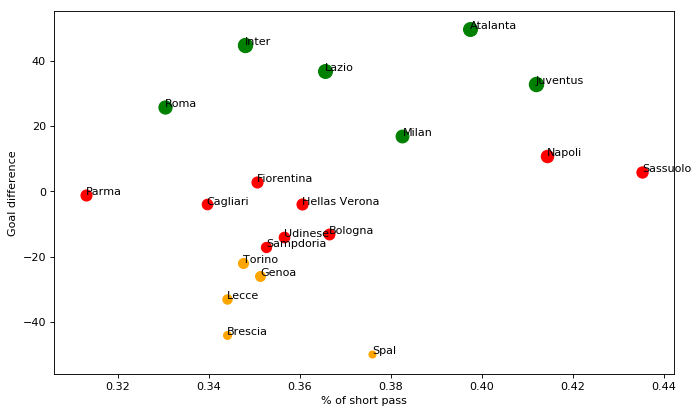

In [98]:
pyplot.figure(figsize=(10, 6), dpi=80)
for i in range(0, len(yhat)):
    if yhat[i] == 0:
        pyplot.scatter(per[i], gd[i], c='red', s=new[i][0]*2)
    if yhat[i] == 1:
        pyplot.scatter(per[i], gd[i], c='green', s=new[i][0]*2)
    if yhat[i] == 2:
        pyplot.scatter(per[i], gd[i], c='orange', s=new[i][0]*2)
    if yhat[i] == 3:
        pyplot.scatter(per[i], gd[i], c='blue', s=new[i][0]*2)
    if yhat[i] == 4:
        pyplot.scatter(per[i], gd[i], c='blue', s=new[i][0]*2)

for i in range(0, len(yhat)):
    pyplot.annotate(team[i], (per[i], gd[i]))


pyplot.ylabel("Goal difference")
pyplot.xlabel("% of short pass")

In [99]:
first = []
middle = []
last = []


for i in range(0, len(yhat)):
    if yhat[i] == 1:
        first.append(team[i])
    if yhat[i] == 0:
        middle.append(team[i])
    if yhat[i] == 2:
        last.append(team[i])

In [100]:
first

['Juventus', 'Inter', 'Atalanta', 'Lazio', 'Roma', 'Milan']

In [101]:
middle

['Napoli',
 'Sassuolo',
 'Hellas Verona',
 'Fiorentina',
 'Parma',
 'Bologna',
 'Udinese',
 'Cagliari',
 'Sampdoria']

In [102]:
last

['Torino', 'Genoa', 'Lecce', 'Brescia', 'Spal']